## Intento de explorar las distribuciones posteriores de planetas extrasolares

Con una función beta. Con código de Fabio Osorio, UdeA.

In [1]:
### Fabio Osorio ###
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import emcee
import corner

In [2]:
### Fabio Osorio ###

file_1 = 'Msini20210325.csv' # Solo Mp_sini
file_2 = 'Mass20210325.csv' # Masas totales
file_3 = 'Mass20210327_RV.csv' # Masas totales de los RV
file_4 = 'hi_pert_Mearth.csv' # Masas sintetizadas por el código de Germán Chaparro

#LEE CADA ARCHIVO DE DATOS Y LO CONVIERTE EN UNA LISTS
y1 = np.genfromtxt(file_1, delimiter = ',')	# Lee el csv y lo convierte inmediatamente en un array
#print(len(y1))
y2 = np.genfromtxt(file_2, delimiter = ',')	# Lee el csv y lo convierte inmediatamente en un array
#print(len(y2))
y3 = np.genfromtxt(file_3, delimiter = ',')	# Lee el csv y lo convierte inmediatamente en un array
#print(len(y3))
y4 = np.genfromtxt(file_4, delimiter = ',')	# Lee el csv y lo convierte inmediatamente en un array
#print(len(y4))

In [25]:
### Fabio Osorio ###

y = [y1, y2, y3, y4]				# Arreglo con las listas de los datos
y_n = []					# Arreglo con las listas de los datos normalizados
alphas1 = ['Alpha beta.fit', ]
betas1 = ['Beta beta.fit', ]
datos = ['Mp_sini', 'Mass', 'Mass_RV', 'Mass_synth']		# Arreglo con los nombres de cada lista de datos


In [26]:
### Fabio Osorio ###

for i in range(len(y)):
    # NORMALIZACIÓN DE LOS DATOS
    min = np.min(y[i])
    max = np.max(y[i])
    y_norm = np.array([(x - min)/(max - min) for x in y[i]])
    y_n1 = y_norm[1:-1].copy()
    y_n.append(y_n1)

    a1, b1,l,s= beta.fit(y_n[i], floc=0, fscale=1) # ya normalizados los datos, se fija floc y fscale
    alphas1.append(a1)
    betas1.append(b1)


/Users/germanchaparro/miniconda2/envs/py36/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


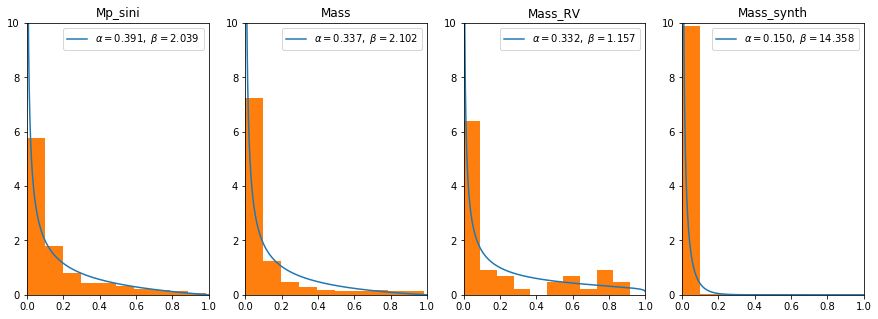

In [28]:
### Fabio Osorio ###

x = np.linspace(0, 1, 1002)[1:-1]
fig = plt.figure(figsize=(15,5))
for i in range(len(y)):
    ax = fig.add_subplot(1, len(y), i+1)
    ax.plot(x, beta.pdf(x, alphas1[i+1], betas1[i+1]), label=r'$\alpha=%.3f,\ \beta=%.3f$' % (alphas1[i+1], betas1[i+1]))
    plt.hist(y_n[i], bins = 10,normed=True)
    plt.title(datos[i])		#Agrega el título a cada subplot  
    plt.xlim(0, 1)
    plt.ylim(0, 10)
    plt.legend(loc = 0)
    
    ax.title.set_text(datos[i])	#Agrega el título a cada subplot

https://emcee.readthedocs.io/en/stable/tutorials/line/

In [33]:
def log_likelihood(theta, y_norm):
    log_a,log_b = theta
    return np.sum(np.log(beta.pdf(y_norm,np.exp(log_a),np.exp(log_b))))

In [34]:
def log_prior(theta):
    log_a, log_b = theta
    if -10.0 < log_a < 10 and -10.0 < log_b < 10:
        return 0.0
    return -np.inf

In [35]:
def log_probability(theta, y_norm):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, y_norm)

Mp_sini


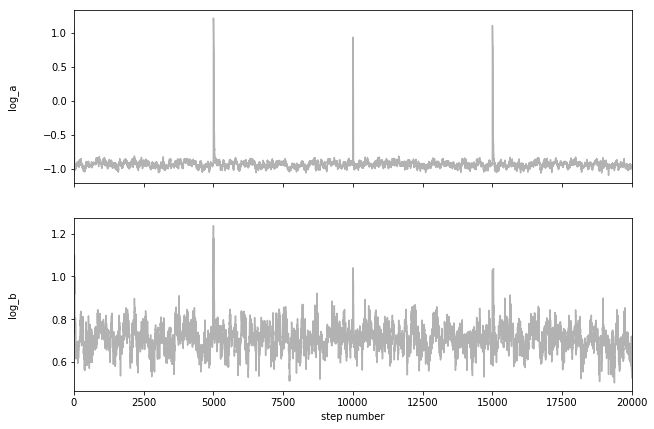

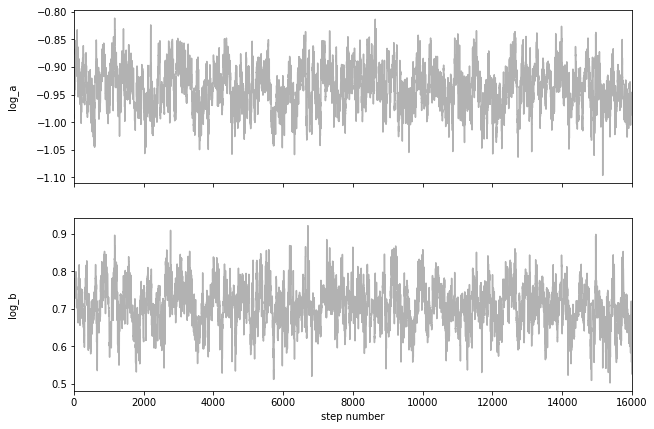

                        Mp_sini


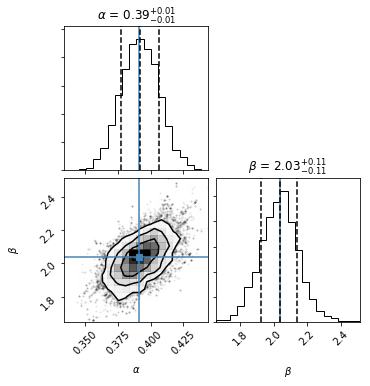

/Users/germanchaparro/miniconda2/envs/py36/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


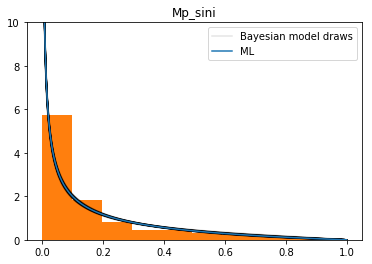

Mass


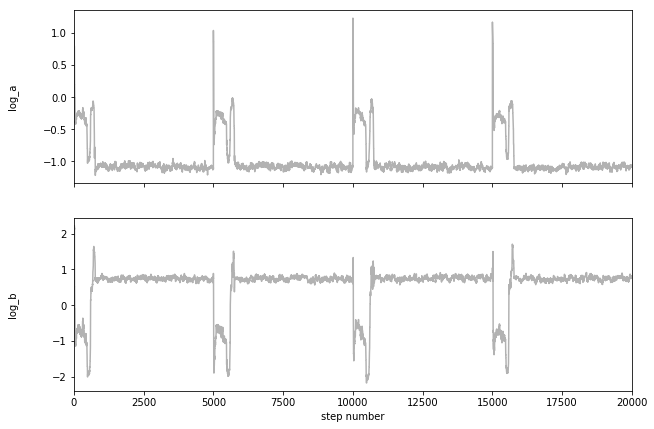

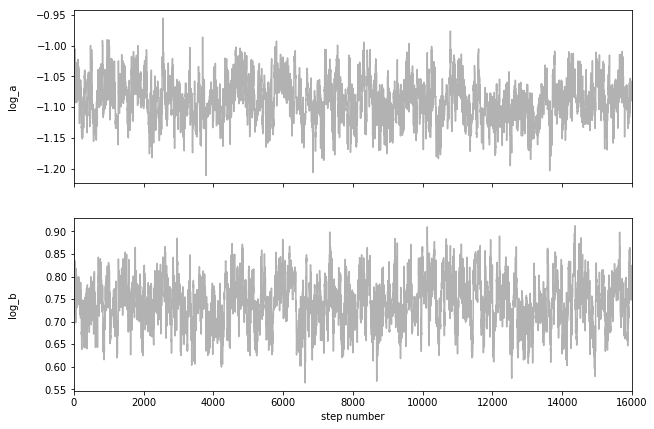

                        Mass


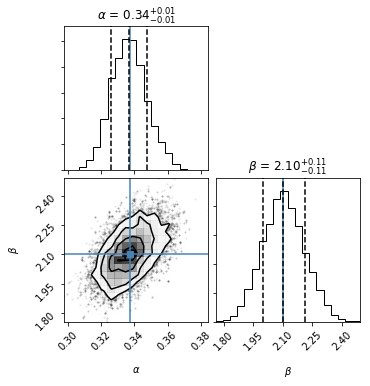

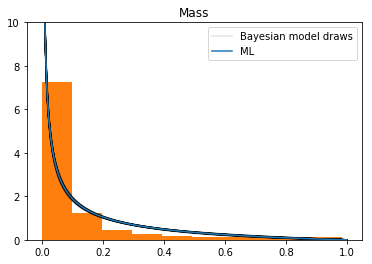

Mass_RV


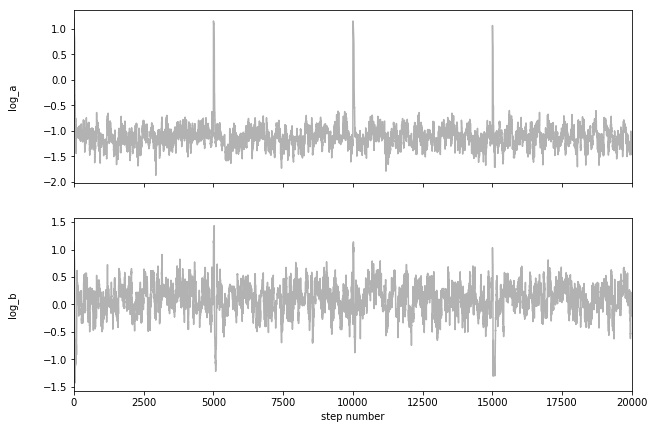

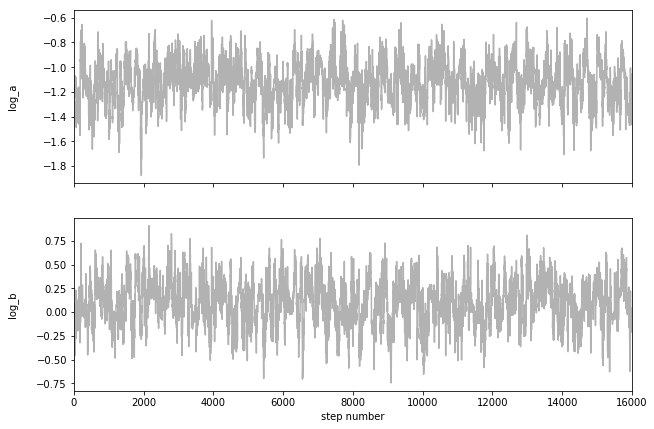

                        Mass_RV


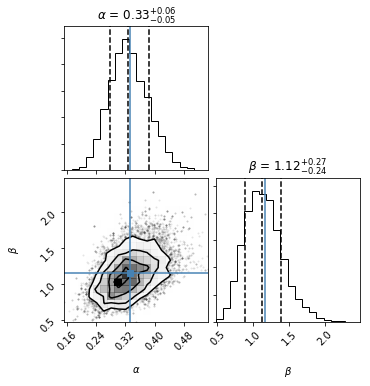

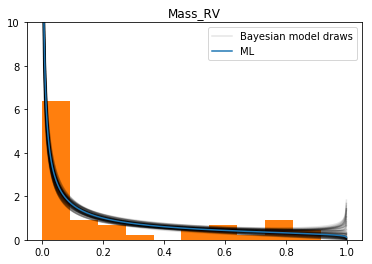

Mass_synth


/Users/germanchaparro/miniconda2/envs/py36/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


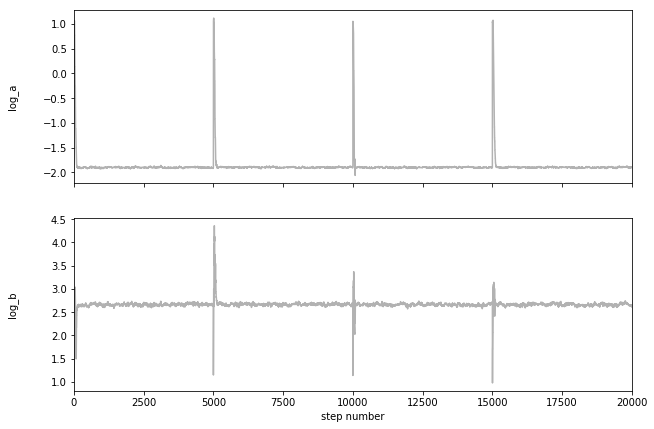

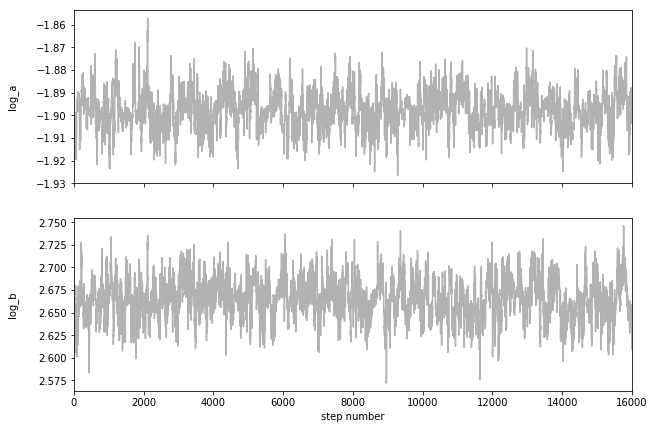

                        Mass_synth


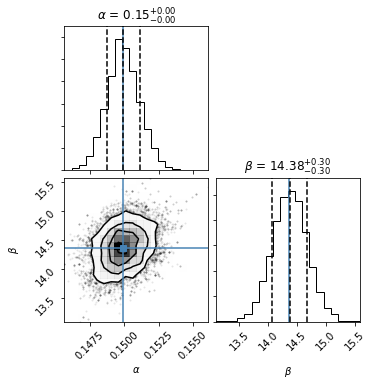

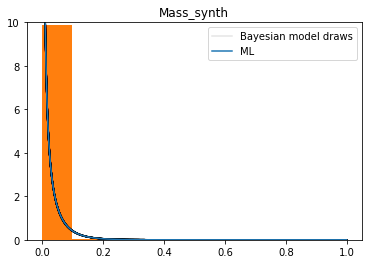

In [42]:
for ii in range(len(y)):
    
    name=datos[ii]
    print(name)
    
    y_norm=y_n[ii]

# mcmc sampling of posterior probability    
    
    pos = [1,1] + 1e-1 * np.abs(np.random.randn(4, 2)) # initial guess -> bad guess to visualize chain convergence
        pos = [1,1] + 1e-1 * np.abs(np.random.randn(4, 2)) # initial guess -> bad guess to visualize chain convergence

    nwalkers, ndim = pos.shape  
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(y_norm[np.newaxis]))
    sampler.run_mcmc(pos, 5000);

# view chains
# 1st plot shows full chain
# 2nd removes first few hundred steps (burn-in phase) to ensure convergence

    fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
    samples = sampler.chain[:, :, :].reshape((-1, ndim))
    #samples = samples[]
    labels = ["log_a", "log_b"]
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("step number");
    plt.show()
    
    fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
    samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("step number");
    plt.show()
    
# corner plot to visualize 1D and 2D posterior projections (marginalization)
# blue lines show ML fit results
# segmented lines show quantiles of 1D posterior projections
    print("                        "+name)
    fig = corner.corner(
        np.exp(samples), labels=[r'$\alpha$',r'$\beta$'],
        truths=[alphas1[ii+1],betas1[ii+1]], quantiles=[0.16, 0.5, 0.84], show_titles=True,title_fmt='.2f'
    );
    plt.show()

# shows model curves sampled from posterior (black lines) and ML model curve (blue)
    
    for log_a,log_b in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(x, beta.pdf(x,np.exp(log_a),np.exp(log_b)), color="k", alpha=0.1)
    plt.plot(x, beta.pdf(x,np.exp(log_a),np.exp(log_b)), color="k", alpha=0.1,label="Bayesian model draws")
    plt.plot(x, beta.pdf(x, alphas1[ii+1],betas1[ii+1]),label="ML")
    plt.hist(y_norm, bins = 10,normed=True)
    plt.legend()
    plt.ylim(0,10)  
    plt.title(name)
    plt.show()